# **SpaceX  Falcon 9 first stage Landing Prediction**


SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. In this lab, you will collect and make sure the data is in the correct format from an API. The following is an example of a successful and launch.



![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/lab_v2/images/landing_1.gif)


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/lab_v2/images/crash.gif)


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests


### Data Collection

From the <code>rocket</code> column we would like to learn the booster name.


In [2]:
def getBoosterVersion(data):
    for x in data['rocket']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
            BoosterVersion.append(response['name'])

From the <code>launchpad</code> we would like to know the name of the launch site being used, the logitude, and the latitude.


In [3]:
def getLaunchSite(data):
    for x in data['launchpad']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])

From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to.


In [4]:
def getPayloadData(data):
    for load in data['payloads']:
        if load:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])

From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, wheter the core is reused, wheter legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.


In [5]:
def getCoreData(data):
    for core in data['cores'] :
        if core['core'] != None:
            response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
            Block.append(response['block'])
            ReusedCount.append(response['reuse_count'])
            Serial.append(response['serial'])
        else:
            Block.append(None)
            ReusedCount.append(None)
            Serial.append(None)
        Outcome.append(str(core['landing_success']) +' '+str(core['landing_type']))
        Flights.append(core['flight'])
        GridFins.append(core['gridfins'])
        Reused.append(core['reused'])
        Legs.append(core['legs'])
        LandingPad.append(core['landpad'])
        

In [6]:
spacex_url = "https://api.spacexdata.com/v4/launches/past"

In [7]:
response = requests.get(spacex_url)

In [8]:
print(response)

<Response [200]>


In [9]:
static_json_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json"


In [10]:
response.status_code

200

In [11]:
data = pd.json_normalize(response.json())

In [12]:
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [13]:
data.columns

Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings'],
      dtype='object')

You will notice that a lot of the data are IDs. For example the rocket column has no information about the rocket just an identification number.

We will now use the API again to get information about the launches using the IDs given for each launch. Specifically we will be using columns <code>rocket</code>, <code>payloads</code>, <code>launchpad</code>, and <code>cores</code>.


In [14]:
import datetime

data = data[["rocket", "payloads", "launchpad", "cores", "flight_number", "date_utc"]]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data["payloads"].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the date of the launches

data = data[data['date'] <= datetime.date(2020, 11, 13)]


* From the <code>rocket</code> we would like to learn the booster name

* From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to

* From the <code>launchpad</code> we would like to know the name of the launch site being used, the longitude, and the latitude.

* **From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.**

The data from these requests will be stored in lists and will be used to create a new dataframe.


In [15]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

These functions will apply the outputs globally to the above variables. Let's take a looks at <code>BoosterVersion</code> variable. Before we apply  <code>getBoosterVersion</code> the list is empty:


In [16]:
BoosterVersion

[]

Now, let's apply <code> getBoosterVersion</code> function method to get the booster version


In [17]:
getBoosterVersion(data)

In [18]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [19]:
#Call getLAunchSite

getLaunchSite(data)

In [20]:
#call getPayloadData
getPayloadData(data)

In [21]:
# Call getCoreData
getCoreData(data)

Finally lets construct our dataset using the data we have obtained. We we combine the columns into a dictionary.


In [22]:
launch_dict = {
    "FlighNumber":list(data['flight_number']),
    "Date" : list(data['date']),
    "BoosterVersion":BoosterVersion,
    "PayloadMass": PayloadMass,
    "Orbit":Orbit,
    "LaunchSite":LaunchSite,
    "Outcome":Outcome,
    "Flights":Flights,
    "GridFins":GridFins,
    "Reused":Reused,
    "Legs":Legs,
    "LandingPad":LandingPad,
    "Block":Block,
    "ReusedCount":ReusedCount,
    "Serial":Serial,
    "Longitude":Longitude,
    "Latitude":Latitude
}

Now we need to create a Pandas DataFrame from the dictionary launch_Dict

In [23]:
data = pd.DataFrame(launch_dict)

In [24]:
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,FlighNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


### Filter the <code>Falcon 9</code> launches data

In [25]:
data_falcon9 = data[data['BoosterVersion'].str.contains("Falcon 9", na=False)].copy()

print(data_falcon9.head())

data_falcon9.to_csv("falcon9_launches.csv", index=False)

   FlighNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4            6  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5            8  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6           10  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7           11  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8           12  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
4    None None        1     False   False  False       None    1.0   
5    None None        1     False   False  False       None    1.0   
6    None None        1     False   False  False       None    1.0   
7  False Ocean        1     False   False  False       None    1.0   
8    None None        1     False   False  False       None    1.0   

   ReusedCount Serial   Longitude   Latitude  
4            0  B0003  -80.577366  28.561857  
5            0  

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [26]:
data_falcon9 = pd.read_csv("falcon9_launches.csv")
data_falcon9.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,FlighNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [27]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,FlighNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,FlightNumber
0,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1
1,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,2
2,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,3
3,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,4
4,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,102,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,86
86,103,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,87
87,104,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,88
88,105,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,89


### Data Wrangling

Handling Missing Value

In [28]:
data_falcon9.isnull().sum()

FlighNumber        0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
FlightNumber       0
dtype: int64

In [29]:
data_falcon9['PayloadMass'].fillna(data_falcon9["PayloadMass"].mean(), inplace=True)


<ipython-input-29-5baf6aa8f08b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_falcon9['PayloadMass'].fillna(data_falcon9["PayloadMass"].mean(), inplace=True)


In [30]:
data_falcon9['LandingPad'].fillna('Unknown', inplace=True)


<ipython-input-30-7e903eba1e84>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_falcon9['LandingPad'].fillna('Unknown', inplace=True)


In [31]:
print(data_falcon9.isnull().sum())  # Should print 0 missing values


FlighNumber       0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
FlightNumber      0
dtype: int64


In [32]:
data_falcon9.to_csv("dataset_part_1.csv", index=False)

In [33]:
data = pd.read_csv("dataset_part_1.csv")
data.head()

,FlighNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,FlightNumber
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0003,-80.577366,28.561857,1
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0005,-80.577366,28.561857,2
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0007,-80.577366,28.561857,3
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,Unknown,1.0,0,B1003,-120.610829,34.632093,4
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B1004,-80.577366,28.561857,5


In [34]:
data.isnull().sum()/data.shape[0]*100

FlighNumber       0.0
Date              0.0
BoosterVersion    0.0
PayloadMass       0.0
Orbit             0.0
LaunchSite        0.0
Outcome           0.0
Flights           0.0
GridFins          0.0
Reused            0.0
Legs              0.0
LandingPad        0.0
Block             0.0
ReusedCount       0.0
Serial            0.0
Longitude         0.0
Latitude          0.0
FlightNumber      0.0
dtype: float64

In [35]:
data.dtypes


FlighNumber         int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
FlightNumber        int64
dtype: object

### the number of launches on each site

The data contains several Space X  launch facilities: <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>Cape Canaveral Space</a> Launch Complex 40  <b>VAFB SLC 4E </b> , Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.The location of each Launch Is placed in the column <code>LaunchSite</code>


In [36]:
data['LaunchSite'].value_counts()

LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

Each launch aims to an dedicated orbit, and here are some common orbit types:


*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[1]</a>.

*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[2]</a>.

*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" >\[3] </a>.

*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[4] <a>.

*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01#L1_point">\[5]</a> .

*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[6]</a>.

*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[7] </a>

*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[8] </a>

*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[9] </a>

*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[10] </a>

*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[11] </a>

some are shown in the following plot:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)


In [37]:
data["Orbit"].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [38]:
landing_outcomes = data["Outcome"].value_counts()

In [39]:
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

<code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully  landed to a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. <code>None ASDS</code> and <code>None None</code> these represent a failure to land.


In [40]:
for i, outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [41]:
bad_outcomes = set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

Using the <code>Outcome</code>,  create a list where the element is zero if the corresponding  row  in  <code>Outcome</code> is in the set <code>bad_outcome</code>; otherwise, it's one. Then assign it to the variable <code>landing_class</code>:


In [42]:
landing_class = [0 if any(bad in str(outcome) for bad in bad_outcomes) else 1 for outcome in data_falcon9['Outcome']]


In [43]:
data["Class"] = landing_class
data[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [44]:
data.head(8)

,FlighNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,FlightNumber,Class
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0003,-80.577366,28.561857,1,0
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0005,-80.577366,28.561857,2,0
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0007,-80.577366,28.561857,3,0
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,Unknown,1.0,0,B1003,-120.610829,34.632093,4,0
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B1004,-80.577366,28.561857,5,0
5,13,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B1005,-80.577366,28.561857,6,0
6,14,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,Unknown,1.0,0,B1006,-80.577366,28.561857,7,1
7,15,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,Unknown,1.0,0,B1007,-80.577366,28.561857,8,1


In [45]:
data['Class'].mean()

0.6666666666666666

In [46]:
data.to_csv("dataset_csv_part2.csv", index=False)

### Exploratory Data Analysis

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


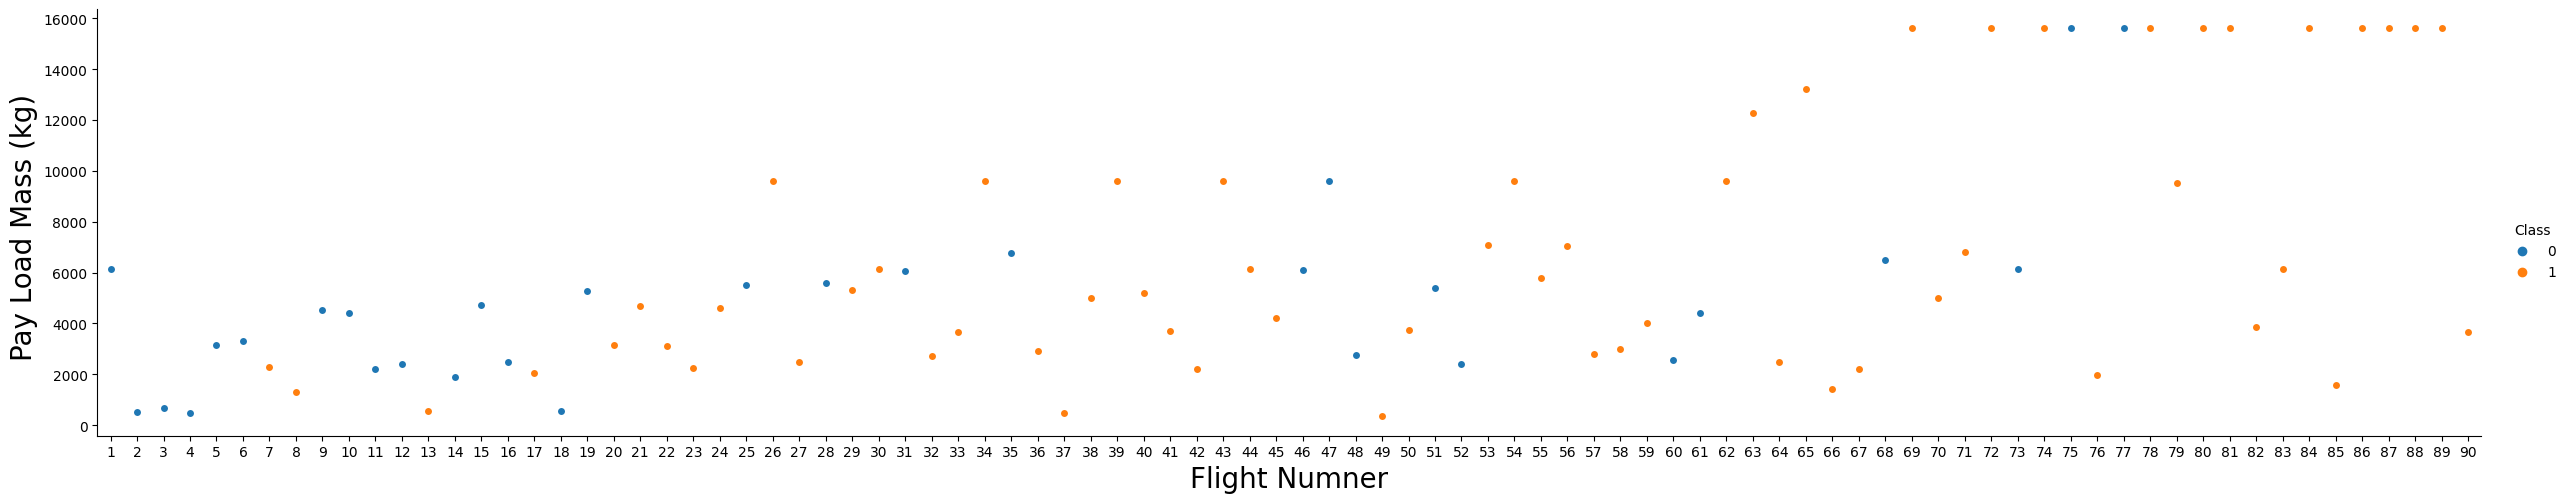

In [47]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data = data, aspect=5)
plt.xlabel("Flight Numner", fontsize=20)
plt.ylabel("Pay Load Mass (kg) ", fontsize=20)
plt.show()

Relationship between Flight Number and Launch Site

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


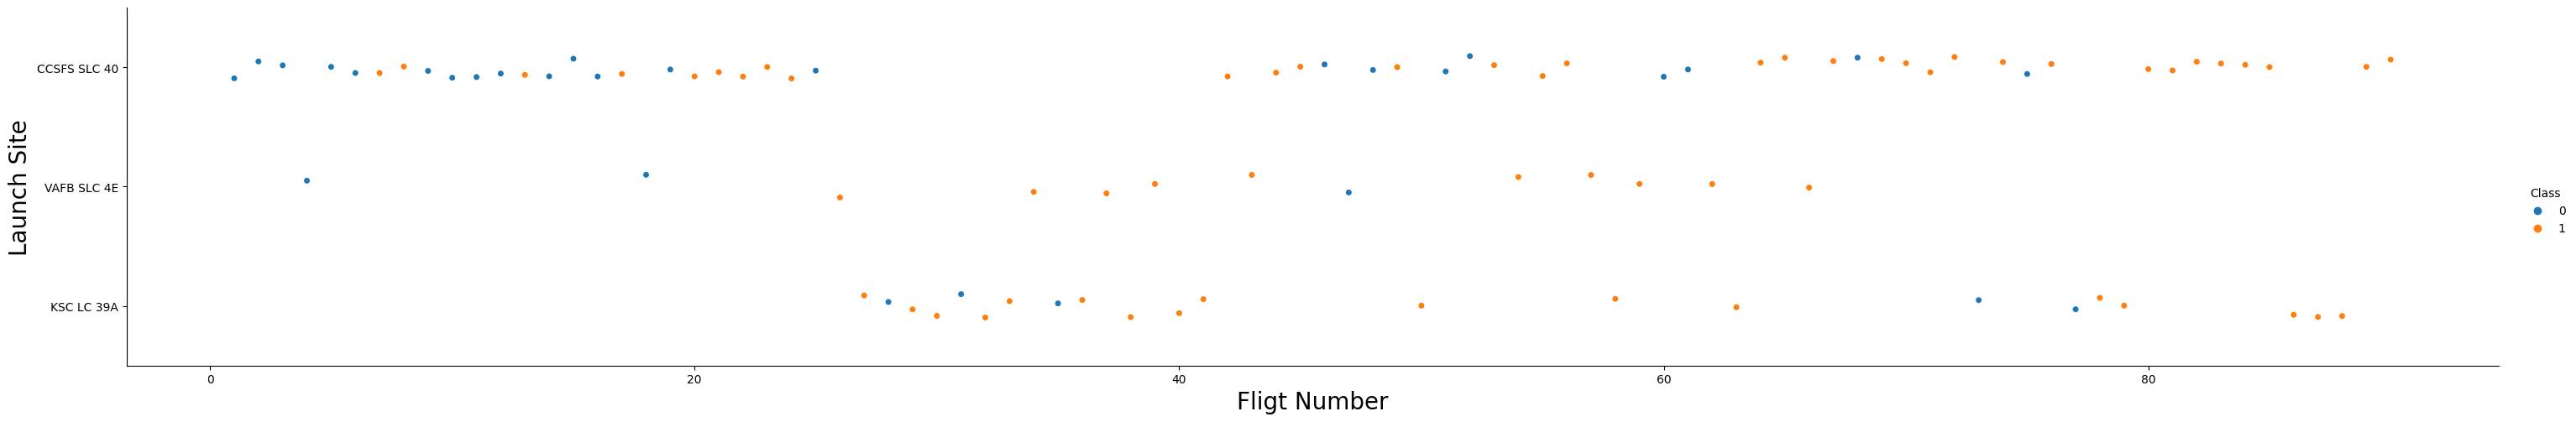

In [48]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=data, aspect=6)
plt.xlabel("Fligt Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


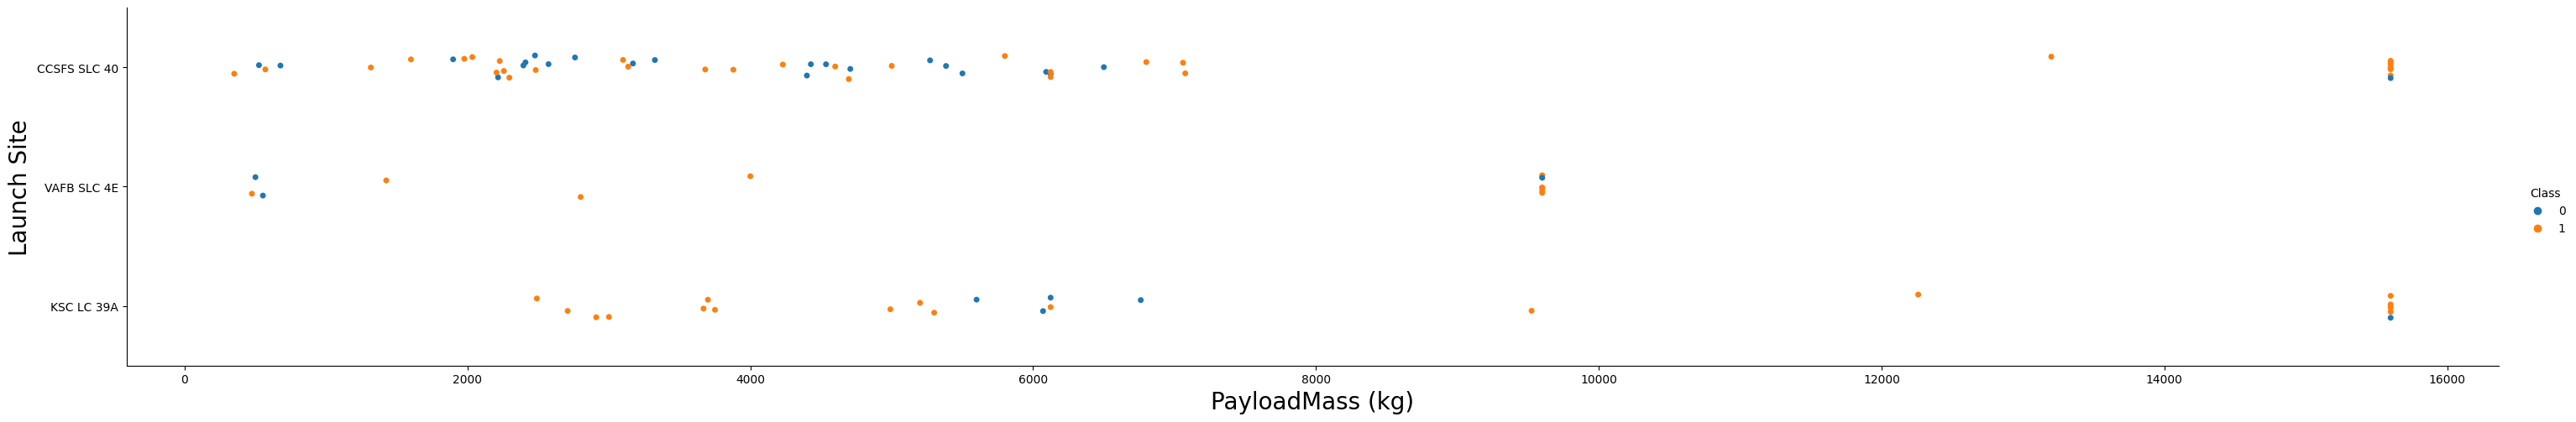

In [49]:
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=data, aspect=6)
plt.xlabel("PayloadMass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

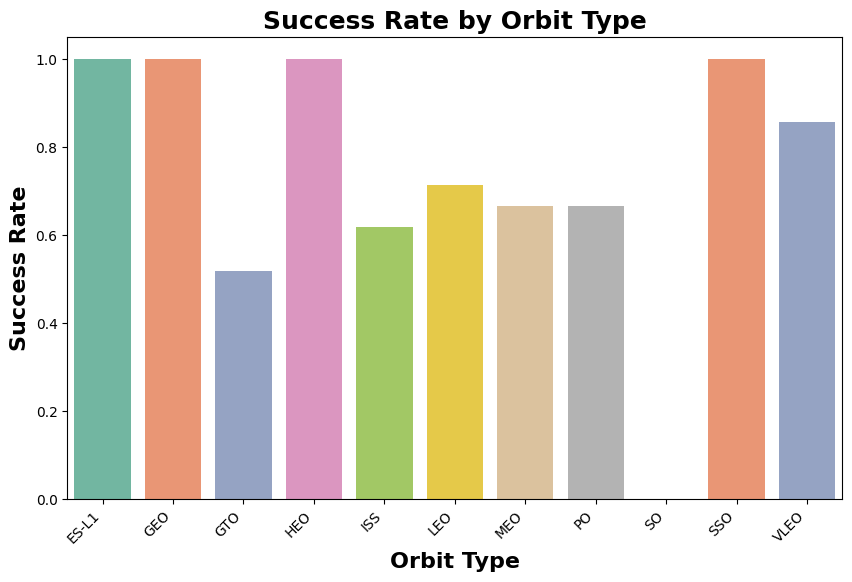

In [50]:
orbit_success_rate = data.groupby('Orbit')['Class'].mean().reset_index()

# Create a bar plot showing the success rate for each orbit type
sns.barplot(
    x="Orbit", 
    y="Class", 
    data=orbit_success_rate, 
    palette="Set2"
)

# Customize labels and title
plt.xlabel("Orbit Type", fontsize=16, weight='bold')
plt.ylabel("Success Rate", fontsize=16, weight='bold')
plt.title("Success Rate by Orbit Type", fontsize=18, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Increase figure size for better visibility
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()


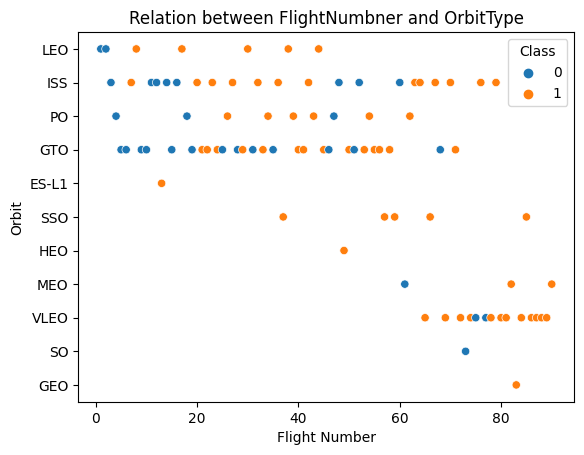

In [51]:
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data = data)
plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.title("Relation between FlightNumbner and OrbitType")
plt.show()

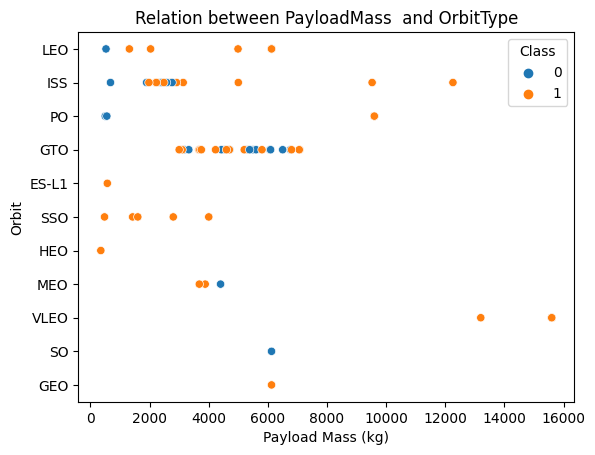

In [52]:
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data = data)
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit")
plt.title("Relation between PayloadMass  and OrbitType")
plt.show()

In [53]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in data["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
data['Date'] = year
data.head()
    

,FlighNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,FlightNumber,Class
0,6,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0003,-80.577366,28.561857,1,0
1,8,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0005,-80.577366,28.561857,2,0
2,10,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0007,-80.577366,28.561857,3,0
3,11,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,Unknown,1.0,0,B1003,-120.610829,34.632093,4,0
4,12,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B1004,-80.577366,28.561857,5,0


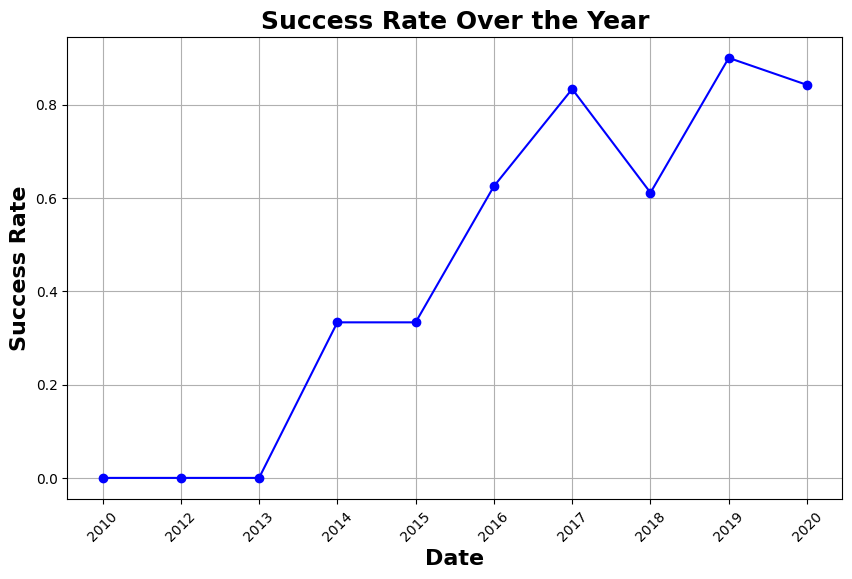

In [54]:
yearly_success_rate = data.groupby('Date')['Class'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(yearly_success_rate['Date'], yearly_success_rate['Class'], marker='o', linestyle="-",color="b")

plt.xlabel("Date", fontsize=16, weight="bold")
plt.ylabel("Success Rate", fontsize=16, weight="bold")
plt.title("Success Rate Over the Year", fontsize=18, weight="bold")

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Feature Engineering

In [55]:
features = data[["FlightNumber", "PayloadMass", "Orbit", "LaunchSite", "Flights", "GridFins","Reused","Legs","LandingPad", "Block", "ReusedCount", "Serial"]]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,Unknown,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B1004


In [56]:
features_one_hot = pd.get_dummies(features, columns=["Orbit", "LaunchSite", "LandingPad", "Serial"])
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)


### Model Training

In [59]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [60]:
data = pd.read_csv("dataset_csv_part2.csv")
data.head()

,FlighNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,FlightNumber,Class
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0003,-80.577366,28.561857,1,0
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0005,-80.577366,28.561857,2,0
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0007,-80.577366,28.561857,3,0
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,Unknown,1.0,0,B1003,-120.610829,34.632093,4,0
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B1004,-80.577366,28.561857,5,0


In [61]:
data.shape

(90, 19)

In [62]:
X = pd.read_csv("dataset_part_3.csv")
X.head(100)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [64]:
Y = data["Class"].to_numpy()

print(type(Y))
print(Y[:5])

<class 'numpy.ndarray'>
[0 0 0 0 0]


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

print(X[:5])

[[-1.71291154  0.         -0.65391284 -1.87082869 -0.83553169 -1.93309133
  -1.57589457 -0.76452913 -0.10599979 -0.10599979 -0.65465367 -0.10599979
  -0.55167728  3.44342023 -0.18569534 -0.33333333 -0.10599979 -0.24253563
  -0.42919754  0.79772404 -0.56879646 -0.4108907  -0.4108907  -0.15075567
  -0.79772404 -0.15075567 -0.39223227  1.56892908  9.43398113 -0.10599979
  -0.10599979 -0.10599979 -0.10599979 -0.10599979 -0.10599979 -0.10599979
  -0.10599979 -0.10599979 -0.10599979 -0.10599979 -0.10599979 -0.10599979
  -0.10599979 -0.10599979 -0.10599979 -0.10599979 -0.10599979 -0.15075567
  -0.10599979 -0.10599979 -0.10599979 -0.10599979 -0.10599979 -0.15075567
  -0.10599979 -0.15075567 -0.15075567 -0.10599979 -0.15075567 -0.15075567
  -0.10599979 -0.10599979 -0.15075567 -0.15075567 -0.15075567 -0.10599979
  -0.10599979 -0.10599979 -0.15075567 -0.21566555 -0.18569534 -0.21566555
  -0.26726124 -0.10599979 -0.24253563 -0.10599979 -0.21566555 -0.18569534
  -0.21566555 -0.18569534 -0.10599979]

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42)


In [67]:
X_train, X_val, y_train, Y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [68]:
print(f"Training Set Size : {X_train.shape}")
print(f"Validation Set Size : {X_val.shape}")
print(f"Testing Set Size : {X_test.shape}")

Training Set Size : (57, 81)
Validation Set Size : (15, 81)
Testing Set Size : (18, 81)


In [69]:
y_test.shape

(18,)

### Logistic Regression

In [70]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [71]:
lr = LogisticRegression(random_state=42)

In [72]:
logrog_cv = GridSearchCV(lr, parameters, cv=10, scoring='accuracy', n_jobs=-1)
logrog_cv.fit(X_train, y_train)
print("Best Parameters: ", logrog_cv.best_params_)

Best Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [73]:
accuracy = logrog_cv.score(X_test, y_test)
print(f"Test Accuracy : {accuracy:.4f}")

Test Accuracy : 0.9444


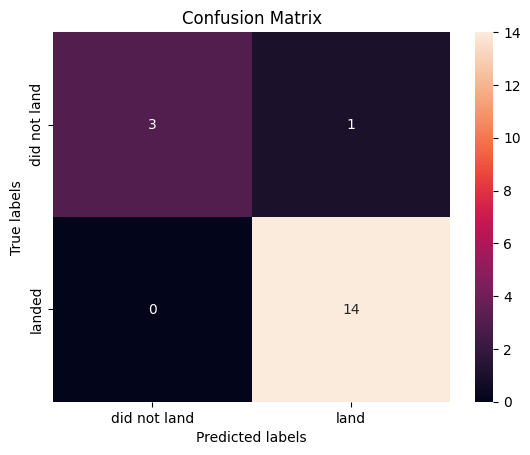

In [74]:
y_pred = logrog_cv.predict(X_test)
plot_confusion_matrix(y_test, y_pred)

### SVM Classifier

In [75]:
parameters = {
    "kernel":('linear','rbf','poly','sigmoid'),
    "C":np.logspace(-3,3,5),
    "gamma":np.logspace(-3,3,5)
}

svm = SVC()

In [76]:
svm_cv = GridSearchCV(svm, parameters, cv=10, scoring= "accuracy", n_jobs=-1)
svm_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='accuracy')

In [77]:
print("Best Parameter : ", svm_cv.best_params_)

Best Parameter :  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}


In [78]:
print("accuracy :",svm_cv.best_score_)

accuracy : 0.8966666666666668


In [79]:
accuracy = svm_cv.score(X_test, y_test)
print(f"Test Accuracy : {accuracy:.4f}")

Test Accuracy : 0.8333


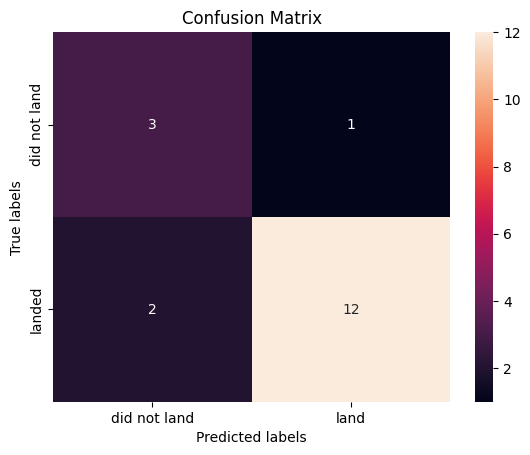

In [80]:
y_pred=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

### Decision Tree Classifier

In [81]:
parameters = {
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth':[2*n for n in range(1,10)],
    'max_features':['auto', 'sqrt'],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10]
}

tree = DecisionTreeClassifier()

In [82]:
decision_cv = GridSearchCV(tree, parameters, cv=10, scoring="accuracy", n_jobs=-1)
decision_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [83]:
print("Best Parameter : ", decision_cv.best_params_)

Best Parameter :  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}


In [84]:
print("Best Accuracy : ", decision_cv.best_score_)

Best Accuracy :  0.95


In [85]:
accuracy = decision_cv.score(X_test, y_test)
print(f"Test Accuracy : {accuracy:.4f}")

Test Accuracy : 0.7778


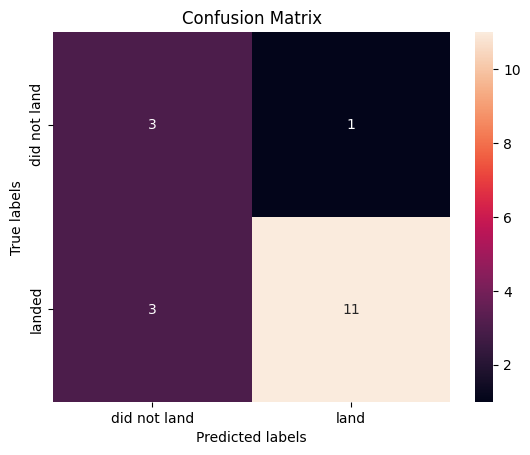

In [86]:
y_pred = decision_cv.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

### KNN Classifier

In [87]:
parameters = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'p':[1,2]
}

KNN = KNeighborsClassifier()

In [88]:
knn_cv = GridSearchCV(KNN, parameters, cv=10, scoring="accuracy",n_jobs=-1)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [89]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}
accuracy : 0.8633333333333335


In [90]:
accuracy = knn_cv.score(X_test, y_test)
print(f"Test Accuracy : {accuracy:.4f}")

Test Accuracy : 0.7222


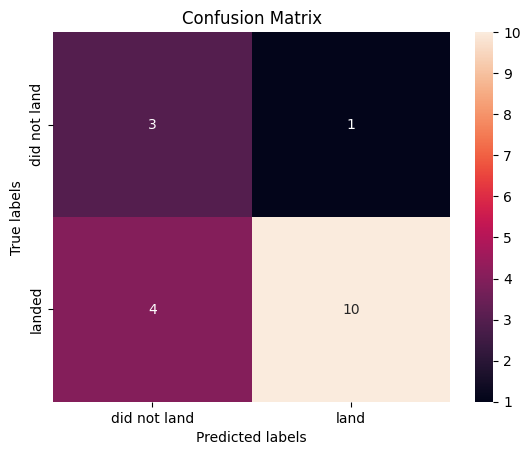

In [91]:
y_pred = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

### Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 19]  # Fixed parameter name
}

rf = RandomForestClassifier(random_state=42)


In [93]:
rf_cv = GridSearchCV(rf, parameters, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model
rf_cv.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 19],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [94]:
print(f"Best parameters: {rf_cv.best_params_}")
print(f"Best accuracy score: {rf_cv.best_score_:.4f}")


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy score: 0.8800


In [95]:
accuracy = rf_cv.score(X_test, y_test)
print(f"Test Accuracy : {accuracy:.4f}")

Test Accuracy : 0.8889


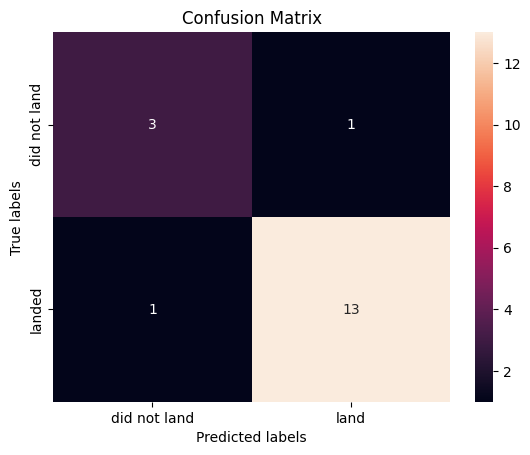

In [96]:
y_pred = rf_cv.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

### Finding the Best Model

In [97]:
models = {
    "Logistic Regression" : logrog_cv,
    "SVM" : svm_cv,
    "KNN" : knn_cv,
    "Random Forest" : rf_cv
}

best_model = None
best_score = 0
best_params = {}

for model_name, model_cv in models.items():
    print(f"{model_name} Best Score: {model_cv.best_score_:.4f}")
    if model_cv.best_score_ > best_score:
        best_score = model_cv.best_score_
        best_model = model_cv.best_estimator_
        best_params = model_cv.best_params_

print("\nBest Model Overall:")
print(f"Best Model: {best_model}")
print(f"Best Score : {best_score:.4f}")
print(f"Best Parameters : {best_params}")

Logistic Regression Best Score: 0.8467
SVM Best Score: 0.8967
KNN Best Score: 0.8633
Random Forest Best Score: 0.8800

Best Model Overall:
Best Model: SVC(gamma=0.03162277660168379, kernel='sigmoid')
Best Score : 0.8967
Best Parameters : {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
